Imports

In [36]:
from filter_datasets import *
import json
import collections
import seaborn as sn
import matplotlib.pyplot as plt
import ppx #A Python interface to proteomics data repositories
from pyteomics import mztab
from ete3 import Tree, NodeStyle, TreeStyle, NodeStyle, faces, AttrFace, CircleFace
from ete3 import NCBITaxa

Search databases in pride:

- Pride_plant.json is the result from filterPride function on PRIDE databases


In [37]:
with open('pride_plant.json') as pride_plants_file:
    pride_plant = json.load(pride_plants_file)
print(f"Total of plants projects retrieved from PRIDE database: {len(pride_plant)}")

Total of plants projects retrieved from PRIDE database: 1464


- Pride_plantas_mztab.json is the result from get_mztabs on PRIDE plants projects

In [38]:
with open("pride_plants_mztab.json") as mztabs:
    pride_plants_mztab = json.load(mztabs)
print(f"Total of projects with mztab files from PRIDE: {len(pride_plants_mztab)}")

Total of projects with mztab files from PRIDE: 270


In [77]:
pride_plants_names = [values["name"] for keys,values in pride_plant.items()]
pride_plants_counter = collections.Counter(pride_plants_names)
plant_names = [plants[0] for plants in pride_plants_counter.most_common(20)]
plant_quant = [plants[1] for plants in pride_plants_counter.most_common(20)]


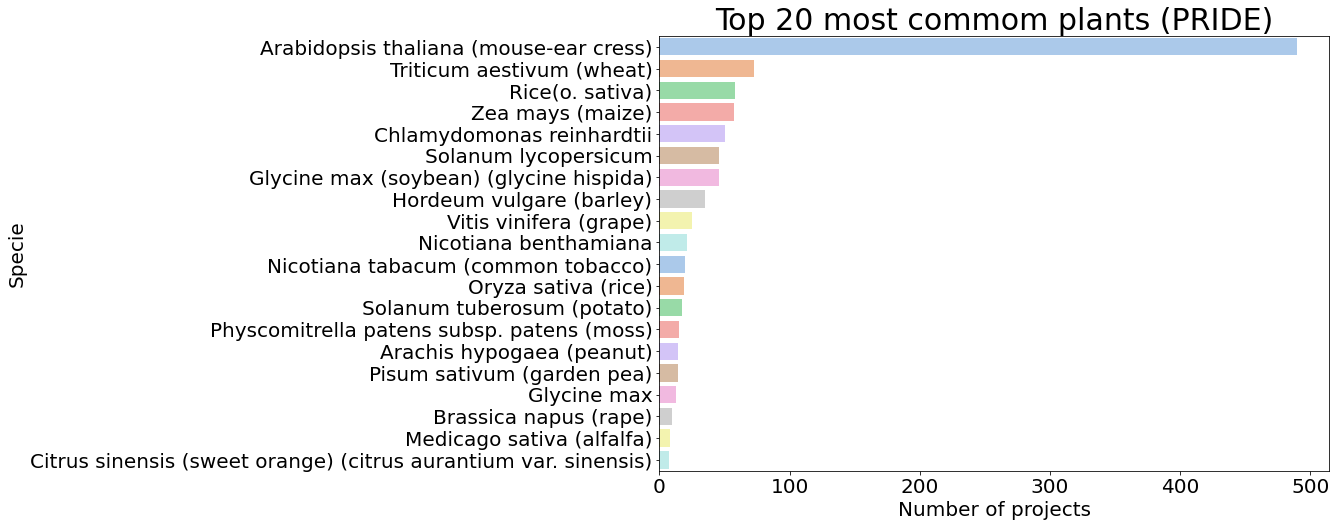

In [85]:
plt.figure(figsize = (12,8))
plants_barblot = sn.barplot(x = plant_quant,y = plant_names,palette = "pastel")
plants_barblot.set_xlabel("Number of projects", fontsize = 20)
plants_barblot.set_ylabel("Specie",fontsize = 20)
plants_barblot.set_title("Top 20 most commom plants (PRIDE)", fontsize = 30)
plants_barblot.tick_params(labelsize = 20)
plt.savefig("fig1_most_commom_plants.png",bbox_inches='tight')


In [73]:
import numpy as np
blablabla = [plants[1] for plants in pride_plants_counter.most_common()]
blablabla  = np.array(blablabla).sum()

In [74]:
blablabla

1464